<a href="http://agrum.org" target="blank"><img src="http://agrum.gitlab.io/theme/img/logoAgrum.png" align="left" style="height:100px"/></a><a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/88x31.png" /></a><br />This pyAgrum's notebook is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.

In [1]:
import os

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt

In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
gnb.configuration()

Library,Version
OS,nt [win32]
Python,"3.9.2 (tags/v3.9.2:1a79785, Feb 19 2021, 13:44:55) [MSC v.1928 64 bit (AMD64)]"
IPython,7.21.0
MatPlotLib,3.3.4
Numpy,1.20.1
pyAgrum,0.19.3.9


# Static Credal Net from BN

In [24]:
bn=gum.fastBN("A->B[3]->C<-D<-A->E->F")
bn_min=gum.BayesNet(bn)
bn_max=gum.BayesNet(bn)
for n in bn.nodes():
    bn_min.cpt(n).scale(0.97)
    bn_max.cpt(n).scale(1.03)
    
cn=gum.CredalNet(bn_min,bn_max)
cn.intervalToCredal()

gnb.sideBySide(bn.cpt("B"),bn_min.cpt("B"),bn_max.cpt("B"))

In [25]:
cn2=gum.CredalNet(bn_min,bn_max)
cn2.intervalToCredal()
cn2.approximatedBinarization()
cn2.computeCPTMinMax()

gnb.sideBySide(cn,cn2)

G <!-- F --> F F <!-- D --> D D <!-- C --> C C <!-- D->C --> D->C <!-- E --> E E <!-- E->F --> E->F <!-- B --> B B <!-- B->C --> B->C <!-- A --> A A <!-- A->D --> A->D <!-- A->E --> A->E <!-- A->B --> A->B


In [26]:
ie=gum.CNMonteCarloSampling(cn)
ie2_lbp=gum.CNLoopyPropagation(cn2)
ie2_mc=gum.CNMonteCarloSampling(cn2)

ie.makeInference()
ie2_lbp.makeInference()
ie2_mc.makeInference()

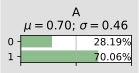

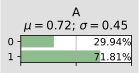

In [28]:
ie.marginalMax("A"),ie2_lbp.marginalMax("A"),ie2_mc.marginalMax("A")
p=gum.Potential().add(cn.current_bn().variableFromName("A")).fillWith(ie.marginalMin("A"))
gnb.showProba(p)
p=gum.Potential().add(cn.current_bn().variableFromName("A")).fillWith(ie.marginalMax("A"))
gnb.showProba(p)

## Static Credal Net from bif files

In [4]:
cn=gum.CredalNet(os.path.join("res","cn/2Umin.bif"),os.path.join("res","cn/2Umax.bif"))
cn.intervalToCredal()

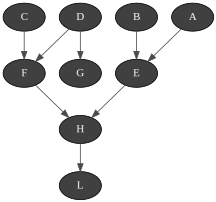

In [5]:
gnb.showBN(cn.current_bn(),"3")

In [6]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertEvidenceFile(os.path.join("res","cn/L2U.evi"))

In [7]:
ie.setRepetitiveInd(False)

ie.setRepetitiveInd(False)
ie.setMaxTime(1)
ie.setMaxIter(1000)

ie.makeInference()

In [8]:
print(ie.marginalMax(0))
print(ie.marginalMin(0))

(0.6942160223512395, 0.5607772501501009)
(0.439222749849899, 0.30578397764876053)


## Dynamical Credal Net

In [9]:
cn=gum.CredalNet(os.path.join("res","cn/bn_c_8.bif"),os.path.join("res","cn/den_c_8.bif"))
cn.bnToCredal(0.8,False)

In [10]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(True)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()

In [11]:
print(ie.dynamicExpMax("temp"))

(14.20340464862347, 11.718137408680768, 12.190483075680442, 11.99476087981647, 11.975306510688327, 11.964973878078364, 11.965031829300205, 11.96501512083492, 11.965015808981818)


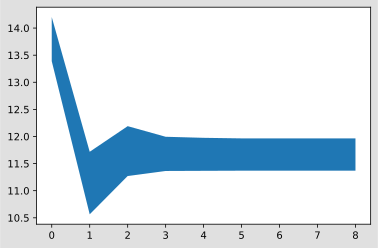

In [12]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

In [13]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(1000)

ie.makeInference()


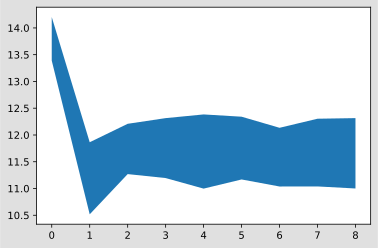

In [14]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"))

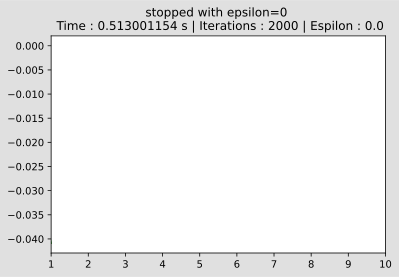

In [15]:
ie=gum.CNMonteCarloSampling(cn)
ie.insertModalsFile(os.path.join("res","cn/modalities.modal"))

ie.setRepetitiveInd(False)
ie.setMaxTime(30)
ie.setMaxIter(2000)

gnb.animApproximationScheme(ie)
ie.makeInference()

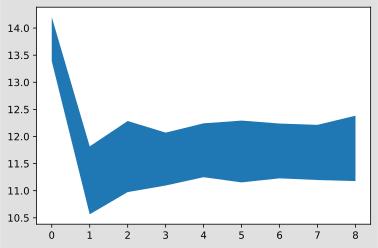

In [16]:
fig=figure()
ax=fig.add_subplot(111)
ax.fill_between(range(9),ie.dynamicExpMax("temp"),ie.dynamicExpMin("temp"));

# Comparing inference in credal networks

In [17]:
import pyAgrum as gum

def showDiffInference(model,mc,lbp):
    for i in model.current_bn().nodes():
        a,b=mc.marginalMin(i)
        c,d=mc.marginalMax(i)
        
        e,f=lbp.marginalMin(i)
        g,h=lbp.marginalMax(i)
        
        plt.scatter([a,b,c,d],[e,f,g,h])
        

cn=gum.CredalNet("res/cn/2Umin.bif","res/cn/2Umax.bif")
cn.intervalToCredal()
cn.computeCPTMinMax()

## The two inference give quite the same result

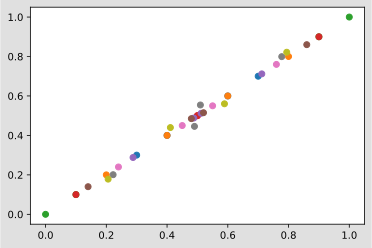

In [21]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)

## but not when evidence are inserted

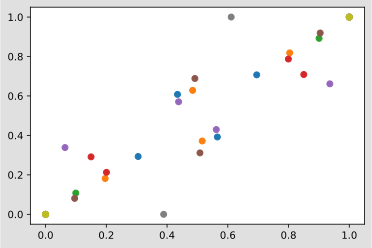

In [22]:
ie_mc=gum.CNMonteCarloSampling(cn)
ie_mc.insertEvidenceFile("res/cn/L2U.evi")
ie_mc.makeInference()

ie_lbp=gum.CNLoopyPropagation(cn)
ie_lbp.insertEvidenceFile("res/cn/L2U.evi")
ie_lbp.makeInference()

showDiffInference(cn,ie_mc,ie_lbp)
